In [99]:
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib as mpl
import matplotlib.pyplot as plt
import random as rd
#IMPLEMENTED FUNCTIONS
from functions import make_matrix, get_tol_matrix, iteration, dis_algo, print_matrix, get_happiness, get_agents, get_r, save_data

Define system conditions

In [55]:
N       = 50 # MATRIX SIZE
density = 0.9 # POPULATION DENSITY ON LATICE
f1      = 0.5 # STARTING POPULATION PERCENTAGE FOR RED POPULATION
tmin    = 0.1 # MINIMUM TOLERANCE (BORDER CONDITION ON MAXIMUM R VALUE)
tmax    = 0.9 # MAXIMUM TOLERANCE (BORDER CONDITION ON MINIMUM R VALUE)

In [48]:
output = run(N=N, density=density, f1=f1, measure_r_values=True)

# QUANDO NÃO HÁ MINORIA

In [115]:
#CENTRAL LIMIT THEOREM

avg_r_blu_ = list()
avg_r_red_ = list()

for i in range(1000):
    print(str(i))
    output = run(N=N, density=density, f1=f1, measure_r_values=True)
    
    avg_r_red.append(average(output['red_rs'][-1]))
    avg_r_blu.append(average(output['blu_rs'][-1]))

0
1inished!
2inished!
3inished!
4inished!
5inished!
6inished!
7inished!
8inished!
9inished!
10nished!
11nished!
12nished!
13nished!
14nished!
15nished!
16nished!
17nished!
18nished!
19nished!
20nished!
21nished!
22nished!
23nished!
24nished!
25nished!
26nished!
27nished!
28nished!
29nished!
30nished!
31nished!
32nished!
33nished!
34nished!
35nished!
36nished!
37nished!
38nished!
39nished!
40nished!
41nished!
42nished!
43nished!
44nished!
45nished!
46nished!
47nished!
48nished!
49nished!
50nished!
51nished!
52nished!
53nished!
54nished!
55nished!
56nished!
57nished!
58nished!
59nished!
60nished!
61nished!
62nished!
63nished!
64nished!
65nished!
66nished!
67nished!
68nished!
69nished!
70nished!
71nished!
72nished!
73nished!
74nished!
75nished!
76nished!
77nished!
78nished!
79nished!
80nished!
81nished!
82nished!
83nished!
84nished!
85nished!
86nished!
87nished!
88nished!
89nished!
90nished!
91nished!
92nished!
93nished!
94nished!
95nished!
96nished!
97nished!
98nished!
99nished!
100ished

KeyboardInterrupt: 

In [103]:
def gauss(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


In [93]:
(mu_r, sigma_r) = norm.fit(avg_r_red)
(mu_b, sigma_b) = norm.fit(avg_r_blu)

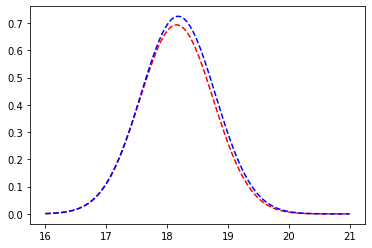

In [130]:
#n_r, bins, patch = plt.hist(avg_r_red, 40, color='red' , density=True, alpha=0.4)
#n_b, bins, patch = plt.hist(avg_r_blu, 40, color='blue', density=True, alpha=0.4)

plt.plot(x, max(n_r)*gauss(x, mu_r, sigma_r), '--', color='red')
plt.plot(x, max(n_b)*gauss(x, mu_b, sigma_b), '--', color='blue')

In [123]:
data      = [avg_r_red, avg_r_blu]
save_data(data, 'TLC_50_50.txt')

# FAZENDO VARIAR O VALOR DE f1 POR ITERAÇÃO

In [150]:
tmax = 0.9
tmin = 0.1

f1s = np.linspace(0.01, 0.99, 396)

In [147]:
avg_r_blu_ = list()
avg_r_red_ = list()

for f1 in f1s:
    print(str(round(f1, 2)) + '/' + '0.99')
    output = run(N=N, density=density, f1=f1, measure_r_values=True, tmax=tmax, tmin=tmin)
    
    avg_r_red_.append(average(output['red_rs'][-1]))
    avg_r_blu_.append(average(output['blu_rs'][-1]))

0.01/0.99
0.01/0.99


KeyboardInterrupt: 

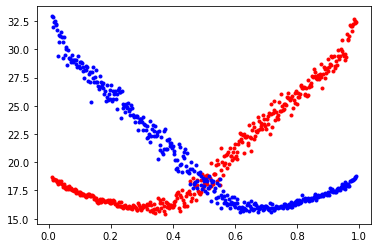

In [139]:
plt.plot(f1s, avg_r_red_, '.', color='red')
plt.plot(f1s, avg_r_blu_, '.', color='blue')

VARIAMOS O INTERVALO DOS VALORES DE T E VEMOS O QUE ACONTECE

In [151]:
tmax = 0.9
tmin = 0.1

f1s = np.linspace(0.01, 0.99, 396)

In [152]:
avg_r_blu_2 = list()
avg_r_red_2 = list()

for f1 in f1s:
    print(str(round(f1, 2)) + '/' + '0.99')
    output = run(N=2*N, density=density, f1=f1, measure_r_values=True, tmax=tmax, tmin=tmin)
    
    avg_r_red_2.append(average(output['red_rs'][-1]))
    avg_r_blu_2.append(average(output['blu_rs'][-1]))

0.01/0.99
0.01/0.99
0.01/0.99
0.02/0.99
0.02/0.99
0.02/0.99
0.02/0.99
0.03/0.99
0.03/0.99
0.03/0.99
0.03/0.99
0.04/0.99
0.04/0.99
0.04/0.99
0.04/0.99
0.05/0.99
0.05/0.99
0.05/0.99
0.05/0.99
0.06/0.99
0.06/0.99
0.06/0.99
0.06/0.99
0.07/0.99
0.07/0.99
0.07/0.99
0.07/0.99
0.08/0.99
0.08/0.99
0.08/0.99
0.08/0.99
0.09/0.99
0.09/0.99
0.09/0.99
0.09/0.99
0.1/0.99!
0.1/0.99!
0.1/0.99!
0.1/0.99!
0.11/0.99
0.11/0.99
0.11/0.99
0.11/0.99
0.12/0.99
0.12/0.99
0.12/0.99
0.12/0.99
0.13/0.99
0.13/0.99
0.13/0.99
0.13/0.99
0.14/0.99
0.14/0.99
0.14/0.99
0.14/0.99
0.15/0.99
0.15/0.99
0.15/0.99
0.15/0.99
0.16/0.99
0.16/0.99
0.16/0.99
0.16/0.99
0.17/0.99
0.17/0.99
0.17/0.99
0.17/0.99
0.18/0.99
0.18/0.99
0.18/0.99
0.18/0.99
0.19/0.99
0.19/0.99
0.19/0.99
0.19/0.99
0.2/0.99!
0.2/0.99!
0.2/0.99!
0.2/0.99!
0.21/0.99
0.21/0.99
0.21/0.99
0.21/0.99
0.22/0.99
0.22/0.99
0.22/0.99
0.22/0.99
0.23/0.99
0.23/0.99
0.23/0.99
0.23/0.99
0.24/0.99
0.24/0.99
0.24/0.99
0.24/0.99
0.25/0.99
0.25/0.99
0.25/0.99
0.25/0.99
0.26/0.99


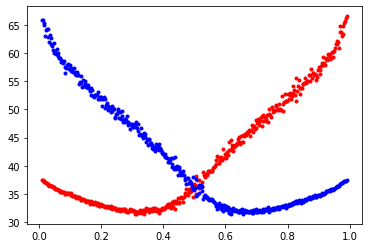

In [153]:
plt.plot(f1s, avg_r_red_2, '.', color='red')
plt.plot(f1s, avg_r_blu_2, '.', color='blue')